In [1]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt 
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np


Ex. 1
Use the generate data() function from pyod.utils.data to generate a 2-
dimensional dataset with 500 normal samples (400 training samples and 100
test samples) with a contamination rate of 0.1.
Use pyplot.scatter() function to plot the training samples, choosing a different color for the outliers.


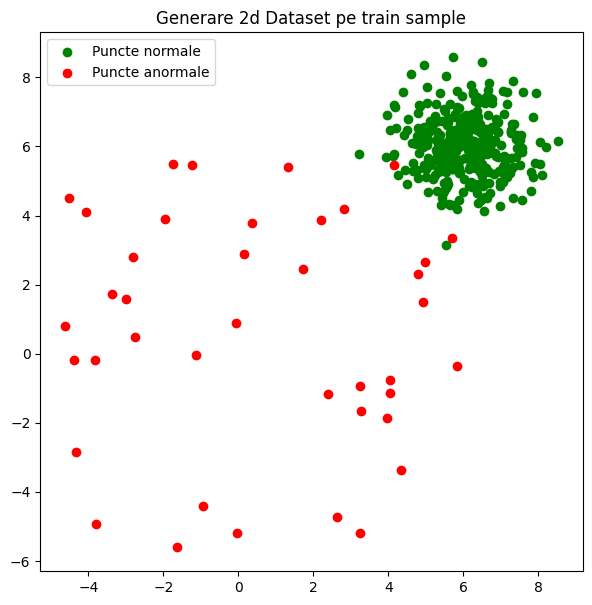

In [ ]:


X_train,X_test,y_train,y_test= generate_data(
    n_train=400,n_test=100,n_features=2, contamination=0.1,random_state=42
)

puncte_normale = X_train[y_train == 0]
puncte_anomalii = X_train[y_train == 1 ]

plt.figure(figsize=(7,7))
plt.scatter(puncte_normale[:,0],puncte_normale[:,1],c="green",label="Puncte normale")
plt.scatter(puncte_anomalii[:,0],puncte_anomalii[:,1],c="red",label="Puncte anormale")
plt.title("Generare 2d Dataset pe train sample")
plt.legend()
plt.show()

Ex. 2
Choose a model from pyod (ex: KNN), leave all the parameters default (except the contamination, which will match the contamination used for dataset
generation) and fit it with the training data. Get the predictions of the model
for both the training and the testing data.
Use the confusion matrix function from sklearn.metrics to find the
number of TN, TP, FN and FP and compute the balanced accuracy.
Use the roc curve() function from sklearn.metrics to compute the ROC
curve and then plot it with plot() function.
Change the contamination rate used by the model and see how the reported
metrics change.

TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95


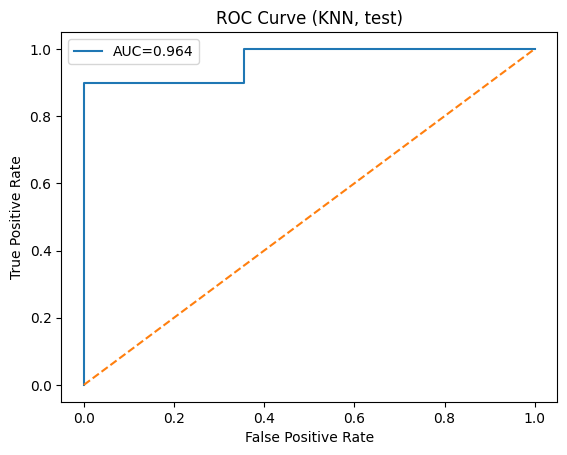


Contamination = 0.05
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95

Contamination = 0.1
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95

Contamination = 0.15
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95

Contamination = 0.2
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95

Contamination = 0.25
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95

Contamination = 0.3
TN_train, FP_train, FN_train, TP_train : (359, 1, 4, 36)  | BA = 0.9486
TN, FP, FN, TP: (90, 0, 1, 9)  | BA = 0.95


In [33]:
knn = KNN(contamination=0.1)
knn.fit(X_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

conf_matrix_train= confusion_matrix(y_train, y_pred_train, labels=[0,1])
conf_matrix_test= confusion_matrix(y_test,y_pred_test,labels=[0,1])

TN,FP,FN,TP = conf_matrix_test.flatten()
TN_train,FP_train,FN_train,TP_train=conf_matrix_train.flatten()

balanced_test= balanced_accuracy_score(y_test,y_pred_test)
balanced_train= balanced_accuracy_score(y_train,y_pred_train)

print("TN_train, FP_train, FN_train, TP_train :", (TN_train.item(), FP_train.item(), FN_train.item(), TP_train.item()), " | BA =", round(balanced_train,4))
print("TN, FP, FN, TP:", (TN.item(), FP.item(), FN.item(), TP.item()), " | BA =", round(balanced_test,4))


score_test= knn.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test,score_test)

roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN, test)")
plt.legend()
plt.show()

for c in [0.05,0.1,0.15,0.2,0.25,0.3]:
    knn_change = KNN(contamination=c)
    knn.fit(X_train)
    yp_tr = knn.predict(X_train)
    yp_te = knn.predict(X_test)
    
    cm_tr = confusion_matrix(y_train, yp_tr, labels=[0,1])
    tn_tr, fp_tr, fn_tr, tp_tr= cm_tr.flatten()
    bal_tr = balanced_accuracy_score(y_train, yp_tr)
    
    cm_te = confusion_matrix(y_test, yp_te, labels=[0, 1])
    tn_te, fp_te, fn_te, tp_te = cm_te.ravel()
    bal_te = balanced_accuracy_score(y_test, yp_te)
    print(f"\nContamination = {c}")
    print("TN_train, FP_train, FN_train, TP_train :", (TN_train.item(), FP_train.item(), FN_train.item(), TP_train.item()), " | BA =", round(balanced_train, 4))
    print("TN, FP, FN, TP:", (TN.item(), FP.item(), FN.item(), TP.item()), " | BA =", round(balanced_test, 4))

3.3 Ex. 3
Generate a unidimensional dataset with 10 % contamination rate, 1000 training samples and no testing samples using generate data(). Try to detect the
anomalies in the dataset by using the Z-scores. In order to do that you should
compute the Z-score threshold that would classify the given percent (contamination rate) of data as anomalies (use np.quantile() function). Compute the
balanced accuracy of the designed method.


TN_train, FP_train, FN_train, TP_train : (871, 29, 29, 71)  | BA = 0.8389


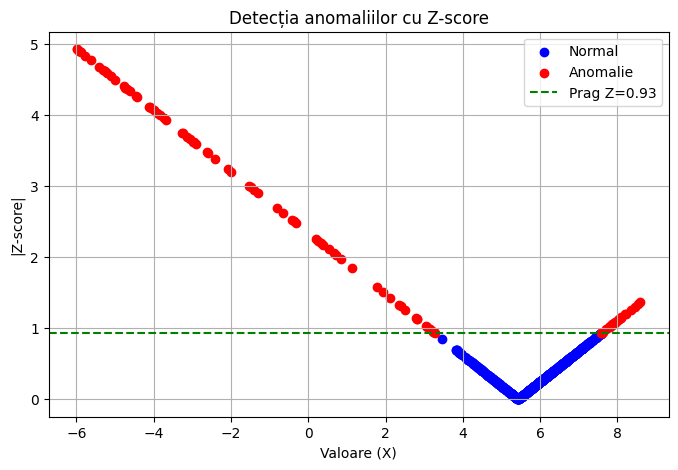

In [40]:
X_train,X_test,y_train,y_test  = generate_data(
    n_train=1000, n_features=1,contamination=0.1, random_state=42
)

x= X_train.flatten()
mu= np.mean(x)
sigma = np.std(x)
if sigma != 0: 
    z = (x - mu ) /sigma
else : 
    z = (x - mu ) / 1.0

abs_z = np.abs(z)

thresholdul= np.quantile(abs_z,1- 0.1)

y_pred_train = ( abs_z > thresholdul).astype(int)

conf_matrix_train = confusion_matrix(y_train,y_pred_train,labels=[0,1])

TN_train, FP_train, FN_train, TP_train = conf_matrix_train.flatten()
balanced_train = balanced_accuracy_score( y_train, y_pred_train)

print("TN_train, FP_train, FN_train, TP_train :", (TN_train.item(), FP_train.item(), FN_train.item(), TP_train.item()), " | BA =", round(balanced_train, 4))

# Am facut si un grafic pentru a fi mai usor 
plt.figure(figsize=(8,5))
plt.scatter(x[y_pred_train == 0], abs_z[y_pred_train == 0], c='blue', label='Normal')
plt.scatter(x[y_pred_train == 1], abs_z[y_pred_train == 1], c='red', label='Anomalie')
plt.axhline(y=thresholdul, color='green', linestyle='--', label=f'Prag Z={thresholdul:.2f}')
plt.title("Detecția anomaliilor cu Z-score")
plt.xlabel("Valoare (X)")
plt.ylabel("|Z-score|")
plt.legend()
plt.grid(True)
plt.show()

3.4 Ex. 4
Same as Ex. 3 but for a multidimensional dataset. Choose your own mean
vector µ and covariance matrix Σ and build your dataset by hand starting with
the samples generated from a multivariate standard normal distribution, x ∼
N (0, I). Using the Cholesky decomposition of the covariance matrix Σ = LLT
draw your samples y like this: y = Lx + µ and then compute the Z-scores. All
other tasks as in Ex. 3.

TN_train, FP_train, FN_train, TP_train : (895, 5, 5, 95)  | BA = 0.9722


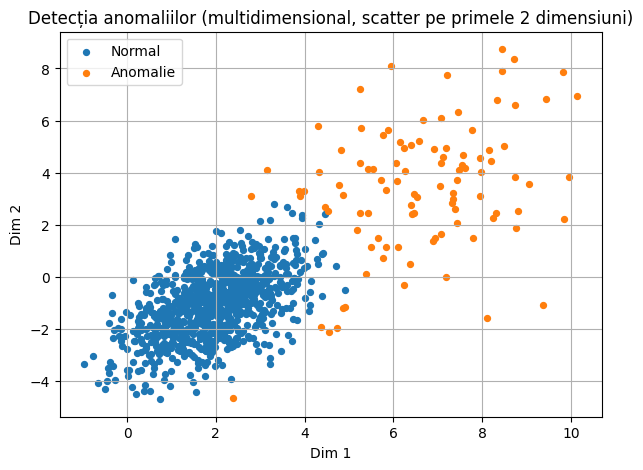

In [9]:
mu = np.array([2,-1])
rng = np.random.default_rng(42)
Sigma = np.array([[1.0, 0.6],
                  [0.6, 1.5]])

L = np.linalg.cholesky(Sigma)

n_out = int ( 0.1 * 1000)

n_in = 1000 - n_out

x_in = rng.standard_normal((n_in, 2))
y_in = x_in @ L.T + mu

delta = np.array([5,5])

Sigma_out = 4 * Sigma

L_out= np.linalg.cholesky(Sigma_out)

x_out = rng.standard_normal((n_out,2))

y_out = x_out @ L_out.T + (mu + delta)

X_train = np.vstack([y_in, y_out])

y_train = np.hstack([np.zeros(n_in, dtype=int), np.ones(n_out, dtype=int)])

z = np.linalg.solve(L, (X_train - mu).T).T 

z_norm = np.linalg.norm(z, axis=1)  

thresholdul = np.quantile(z_norm, 1 - 0.1)

y_pred_train = (z_norm > thresholdul).astype(int)

conf_matrix_train = confusion_matrix(y_train,y_pred_train,labels=[0,1])

TN_train , FP_train , FN_train , TP_train = conf_matrix_train.flatten()

balance_train = balanced_accuracy_score(y_train,y_pred_train)

print("TN_train, FP_train, FN_train, TP_train :", (TN_train.item(), FP_train.item(), FN_train.item(), TP_train.item()),
      " | BA =", round(balance_train, 4))

plt.figure(figsize=(7,5))
plt.scatter(X_train[y_pred_train==0, 0], X_train[y_pred_train==0, 1], s=18, label="Normal")
plt.scatter(X_train[y_pred_train==1, 0], X_train[y_pred_train==1, 1], s=18, label="Anomalie")
plt.title("Detecția anomaliilor (multidimensional, scatter pe primele 2 dimensiuni)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)
plt.show()
